In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.ndimage import gaussian_filter
from galpy.util import bovy_coords as transform

In [2]:
def galcencyl_to_lbdxy(R, phi, z, vR, vT, vz):
    X, Y, Z = transform.galcencyl_to_XYZ(R, phi, z).T
    U, V, W = transform.galcencyl_to_vxvyvz(vR, vT, vz, phi).T
    l, b, d = transform.XYZ_to_lbd(X, Y, Z).T
    vr, pmll, pmbb = transform.vxvyvz_to_vrpmllpmbb(U, V, W, l, b, d).T
    return l, b, d, vr, pmll, pmbb, X, Y

In [3]:
def plot_vRvT(rows, cols, minR, maxR, minphi, maxphi, R, phi, vR, vT):
    R_steps = np.linspace(minR/8., maxR/8., cols+1)
    phi_steps = np.linspace(minphi, maxphi, rows+1)
    width = cols*4
    height = rows*4
    fig, ax = plt.subplots(rows, cols, figsize=(width,height))

    for i in range(rows):
        for j in range(cols):
            mask = (R_steps[j] < R) & (R < R_steps[j+1]) & (phi_steps[i] < phi) & (phi < phi_steps[i+1]) & (np.abs(vR) < 0.5) & (np.abs(vT-0.9) < 0.5)
            H, xedges, yedges = np.histogram2d(vR[mask], vT[mask], bins=75, normed=True)
            xcentres = (xedges[:-1] + xedges[1:]) / 2
            ycentres = (yedges[:-1] + yedges[1:]) / 2
            X, Y = np.meshgrid(xedges, yedges)
            H = H.T
            H_filt = gaussian_filter(H, sigma=1.)

            k = rows-i-1
            if k == 0:
                ax[k,j].set_title('{:.2f} < $R/R_0$ < {:.2f}'.format(*R_steps[j:j+2]))
            if k != rows - 1:
                ax[k,j].get_xaxis().set_visible(False)
            else:
                ax[k,j].set_xlabel('$v_R/v_0$')

            if j == cols - 1:
                ax[k,j].text(1.02, 0.5, '{:.2f} < $\phi$ < {:.2f}'.format(*phi_steps[i:i+2]), 
                             rotation='vertical', transform=ax[k,j].transAxes, verticalalignment='center')
            if j != 0:
                ax[k,j].get_yaxis().set_visible(False)
            else:
                ax[k,j].set_ylabel('$v_T/v_0$')

            ax[k,j].pcolormesh(X, Y, H, cmap='viridis')
            ax[k,j].contour(xcentres, ycentres, H_filt, 7, colors='k')
            ax[k,j].set_facecolor(plt.cm.viridis(0))
            ax[k,j].set_xlim(-0.5, 0.5)
            ax[k,j].set_ylim(0.4, 1.4)

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [4]:
def plot_RvT(rows, cols, minphi, maxphi, R, phi, vT):
    phi_steps = np.linspace(minphi, maxphi, rows*cols+1)
    width = cols*5
    height = rows*5
    fig, ax = plt.subplots(rows, cols, figsize=(width,height))

    for i in range(rows):
        for j in range(cols):
            mask = (R > 3/8.) & (R < 13/8.) & (phi_steps[i*cols + j] < phi) & (phi < phi_steps[i*cols + j + 1])
            ax[i,j].hist2d(R[mask], vT[mask], bins=500)

            if i != rows - 1:
                ax[i,j].get_xaxis().set_visible(False)
            else:
                ax[i,j].set_xlabel('$R/R_0$')

            if j != 0:
                ax[i,j].get_yaxis().set_visible(False)
            else:
                ax[i,j].set_ylabel('$v_T/v_0$')

            ax[i,j].text(0.6, 0.9, '{:.2f} < $\phi$ < {:.2f}'.format(*phi_steps[[i*cols + j, i*cols + j + 1]]), 
                         transform=ax[i,j].transAxes, color='white')

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [5]:
def plot_vlvb(rows, cols, minR, maxR, minphi, maxphi, R, phi, vl, vb, xlim=(-0.3,0.1), ylim=(-0.06,0.06)):
    R_steps = np.linspace(minR/8., maxR/8., cols+1)
    phi_steps = np.linspace(minphi, maxphi, rows+1)
    width = cols*4
    height = rows*4
    fig, ax = plt.subplots(rows, cols, figsize=(width,height))

    for i in range(rows):
        for j in range(cols):
            mask = ((R_steps[j] < R) & (R < R_steps[j+1]) & (phi_steps[i] < phi) & (phi < phi_steps[i+1]) 
                    & (xlim[0] < vl) & (vl < xlim[1]) & (ylim[0] < vb) & (vb < ylim[1]))
            H, xedges, yedges = np.histogram2d(vl[mask], vb[mask], bins=75, normed=True)
            xcentres = (xedges[:-1] + xedges[1:]) / 2
            ycentres = (yedges[:-1] + yedges[1:]) / 2
            X, Y = np.meshgrid(xedges, yedges)
            H = H.T
            H_filt = gaussian_filter(H, sigma=1.)

            k = rows-i-1
            if k == 0:
                ax[k,j].set_title('{:.2f} < $R/R_0$ < {:.2f}'.format(*R_steps[j:j+2]))
            if k != rows - 1:
                ax[k,j].get_xaxis().set_visible(False)
            else:
                ax[k,j].set_xlabel('$v_l$')

            if j == cols - 1:
                ax[k,j].text(1.02, 0.5, '{:.2f} < $\phi$ < {:.2f}'.format(*phi_steps[i:i+2]), 
                             rotation='vertical', transform=ax[k,j].transAxes, verticalalignment='center')
            if j != 0:
                ax[k,j].get_yaxis().set_visible(False)
            else:
                ax[k,j].set_ylabel('$v_b$')

            ax[k,j].pcolormesh(X, Y, H, cmap='viridis')
            ax[k,j].contour(xcentres, ycentres, H_filt, 7, colors='k')
            ax[k,j].set_facecolor(plt.cm.viridis(0))
            ax[k,j].set_xlim(xlim)
            ax[k,j].set_ylim(ylim)

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [6]:
def plot_Rvl(rows, cols, minphi, maxphi, R, phi, vl, ylim=(-0.6,0.2)):
    phi_steps = np.linspace(minphi, maxphi, rows*cols+1)
    width = cols*5
    height = rows*5
    fig, ax = plt.subplots(rows, cols, figsize=(width,height))

    for i in range(rows):
        for j in range(cols):
            mask = ((R > 3/8.) & (R < 13/8.) & (phi_steps[i*cols + j] < phi) & (phi < phi_steps[i*cols + j + 1]) 
                    & (ylim[0] < vl) & (vl < ylim[1]))
            ax[i,j].hist2d(R[mask], vl[mask], bins=500)

            if i != rows - 1:
                ax[i,j].get_xaxis().set_visible(False)
            else:
                ax[i,j].set_xlabel('$R/R_0$')

            if j != 0:
                ax[i,j].get_yaxis().set_visible(False)
            else:
                ax[i,j].set_ylabel('$v_l$')

            ax[i,j].text(0.6, 0.9, '{:.2f} < $\phi$ < {:.2f}'.format(*phi_steps[[i*cols + j, i*cols + j + 1]]), 
                         transform=ax[i,j].transAxes, color='white')
            ax[i,j].set_facecolor(plt.cm.viridis(0))
            ax[i,j].set_ylim(ylim)

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [7]:
def plot_los(rows, cols, minl, maxl, xlength, ywidth, X, Y, vl, xlim=(-0.3,0.2), bins=20):
    dl = (maxl - minl) / cols
    x_steps = np.linspace(0, xlength, rows+1)
    width = cols*5
    height = rows*5
    fig, ax = plt.subplots(rows, cols, figsize=(width,height))
    
    for i in range(rows):
        for j in range(cols):
            M = np.array([[np.cos(dl*j), -np.sin(dl*j)], [np.sin(dl*j), np.cos(dl*j)]])
            X0, Y0 = np.matmul(M, [X, Y])
            
            mask = (x_steps[i] < X0) & (X0 < x_steps[i+1]) & (np.abs(Y0) < ywidth/2)
            
            ax[i,j].hist(vl[mask], histtype='step', bins=bins, normed=True)
            
            if i == 0:
                ax[i,j].set_title('$l$ = {:.2f}'.format(dl*j))
            if i != rows - 1:
                ax[i,j].get_xaxis().set_visible(False)
            else:
                ax[i,j].set_xlabel('$v_l$')
                
            ax[i,j].get_yaxis().set_visible(False)

            if j == 0:
                ax[i,j].text(-0.05, 0.5, '{:.2f} < $d/R_0$ < {:.2f}'.format(*x_steps[i:i+2]), 
                             rotation='vertical', transform=ax[i,j].transAxes, verticalalignment='center')
                
            ax[i,j].set_xlim(xlim)
            
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

# Short fast bar, quickly grown
Bar parameters (mostly the same as Dehnen 2000):
- Pattern speed $\omega = 1.85$ times the local circular frequency
- Initial bar angle $\phi = 25^\circ$
- Growth time $t = 2$ bar periods
- Bar radius: $R_b = 3.5$ kpc
- Bar strength: $\alpha = 1/75$

Total integration time: 4 bar periods, beginning at the initial formation of the bar

In [8]:
data = Table.read('/geir_data/scr/mwbub/data/sfb_short/sfb_short.fits', format='fits')
R, vR, vT, z, vz, phi = data['R', 'vR', 'vT', 'z', 'vz', 'phi'].as_array().view((np.float64, 6)).T
phi[phi > np.pi] -= 2*np.pi
del data

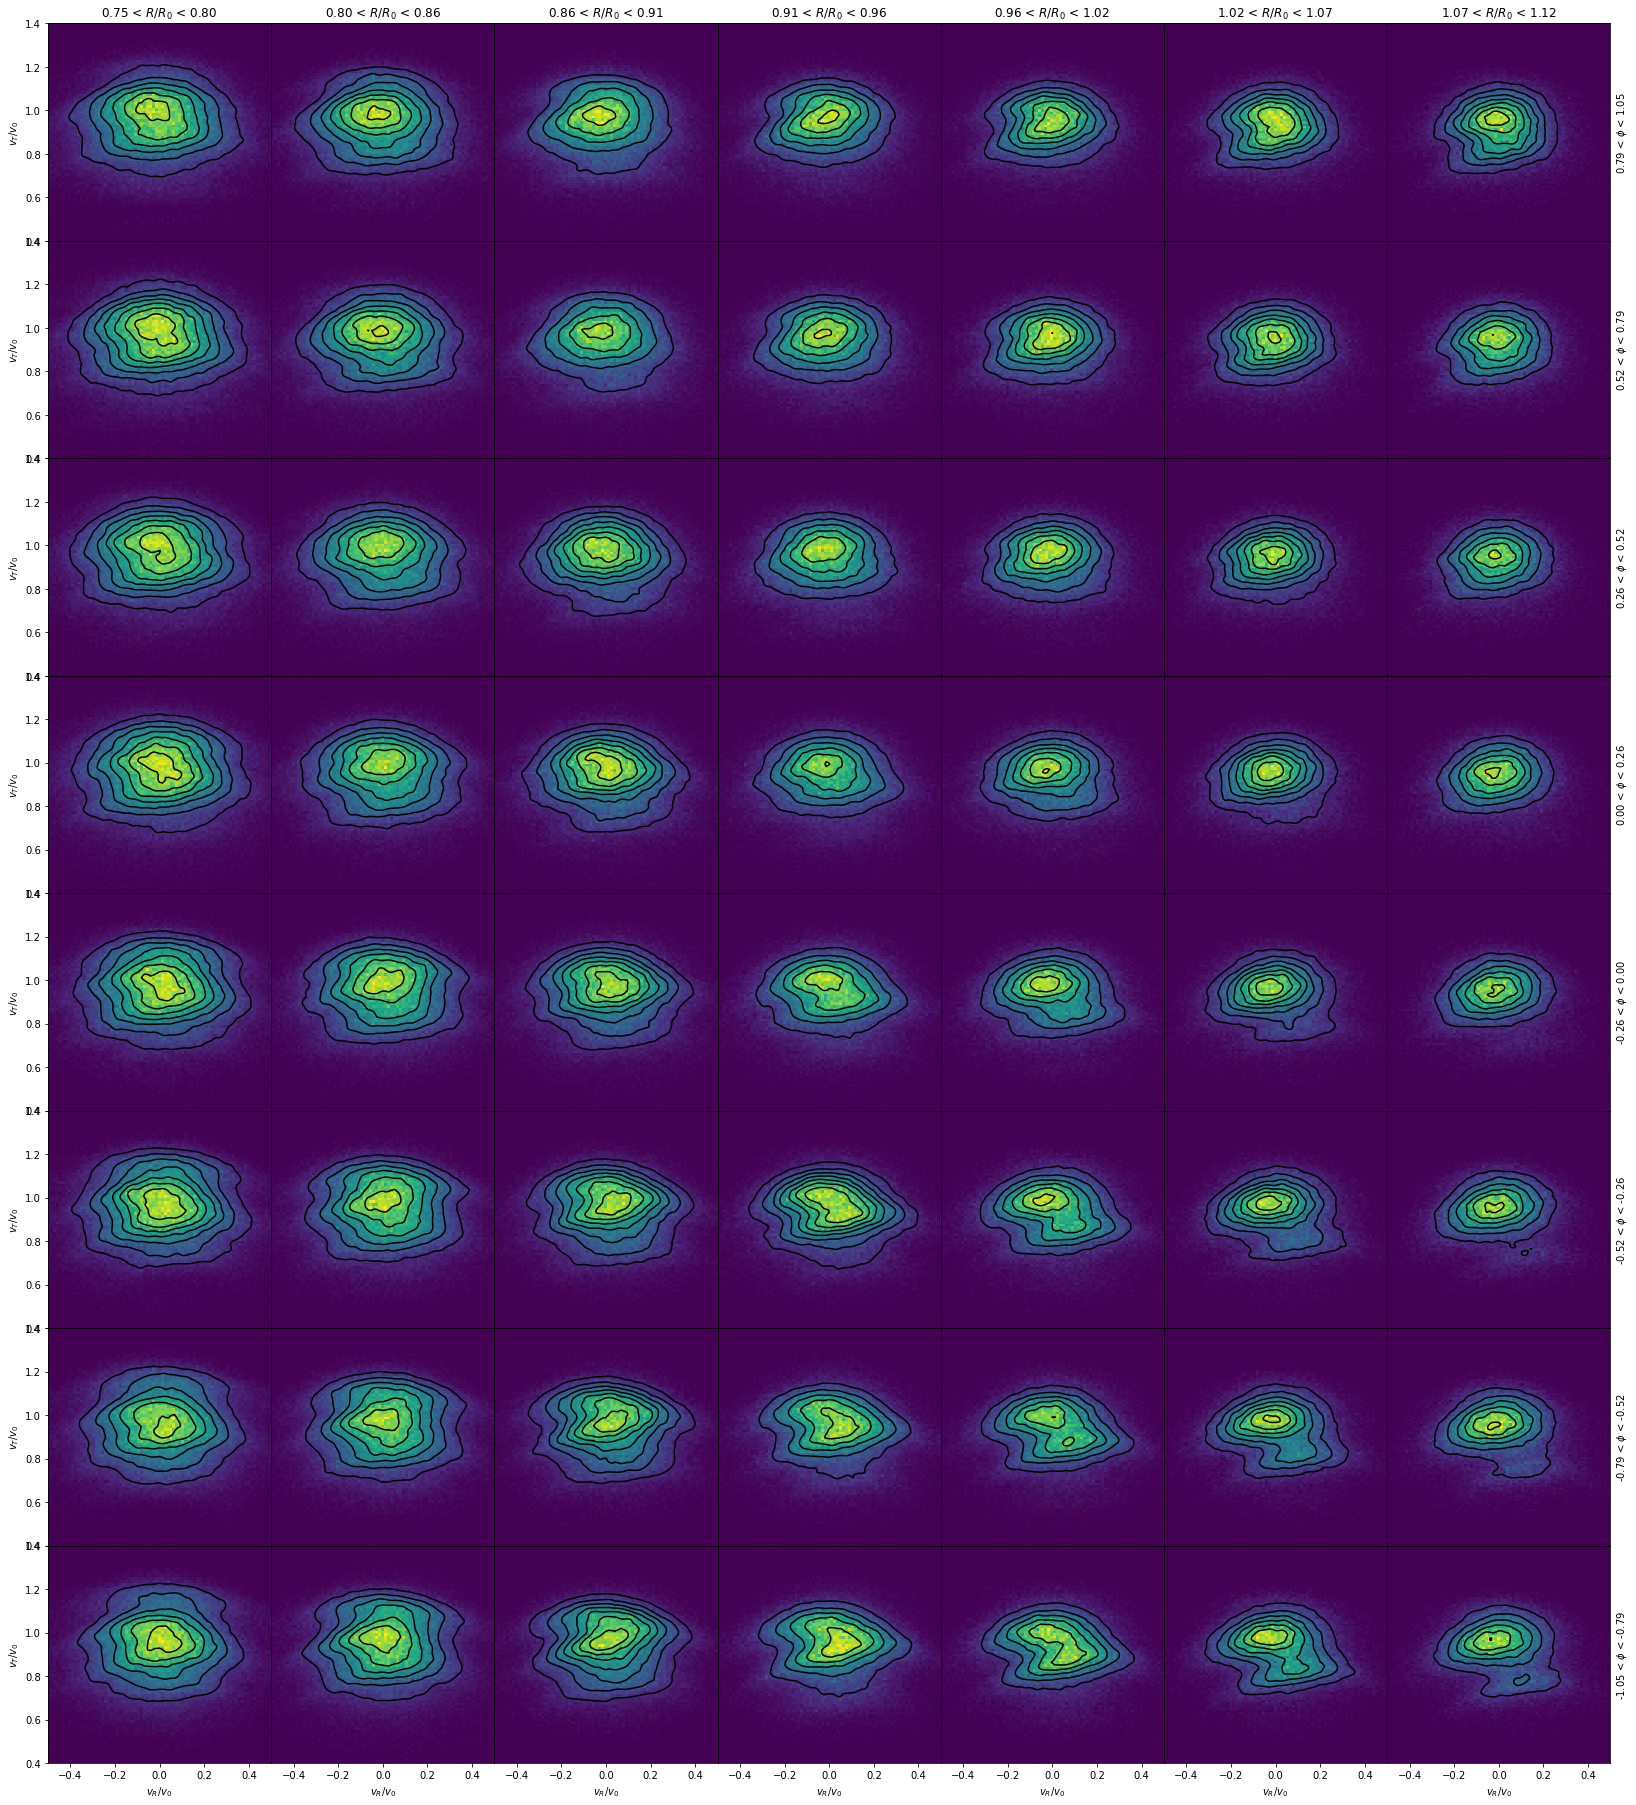

In [9]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vRvT(rows, cols, minR, maxR, minphi, maxphi, R, phi, vR, vT)

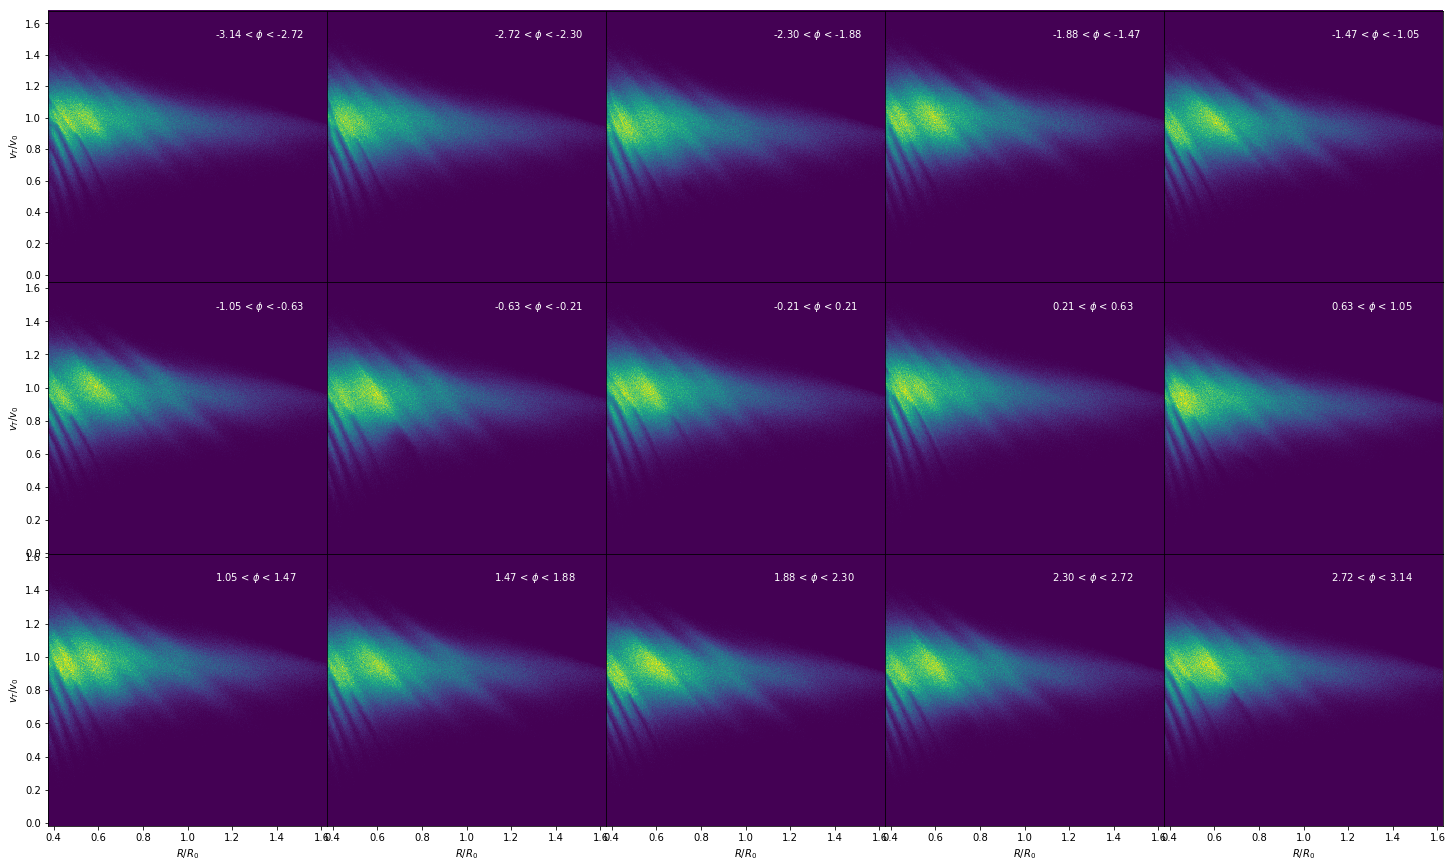

In [10]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_RvT(rows, cols, minphi, maxphi, R, phi, vT)

In [11]:
l, b, d, vr, pmll, pmbb, X, Y = galcencyl_to_lbdxy(R, phi, z, vR, vT, vz)
vl = pmll * d
vb = pmbb * d

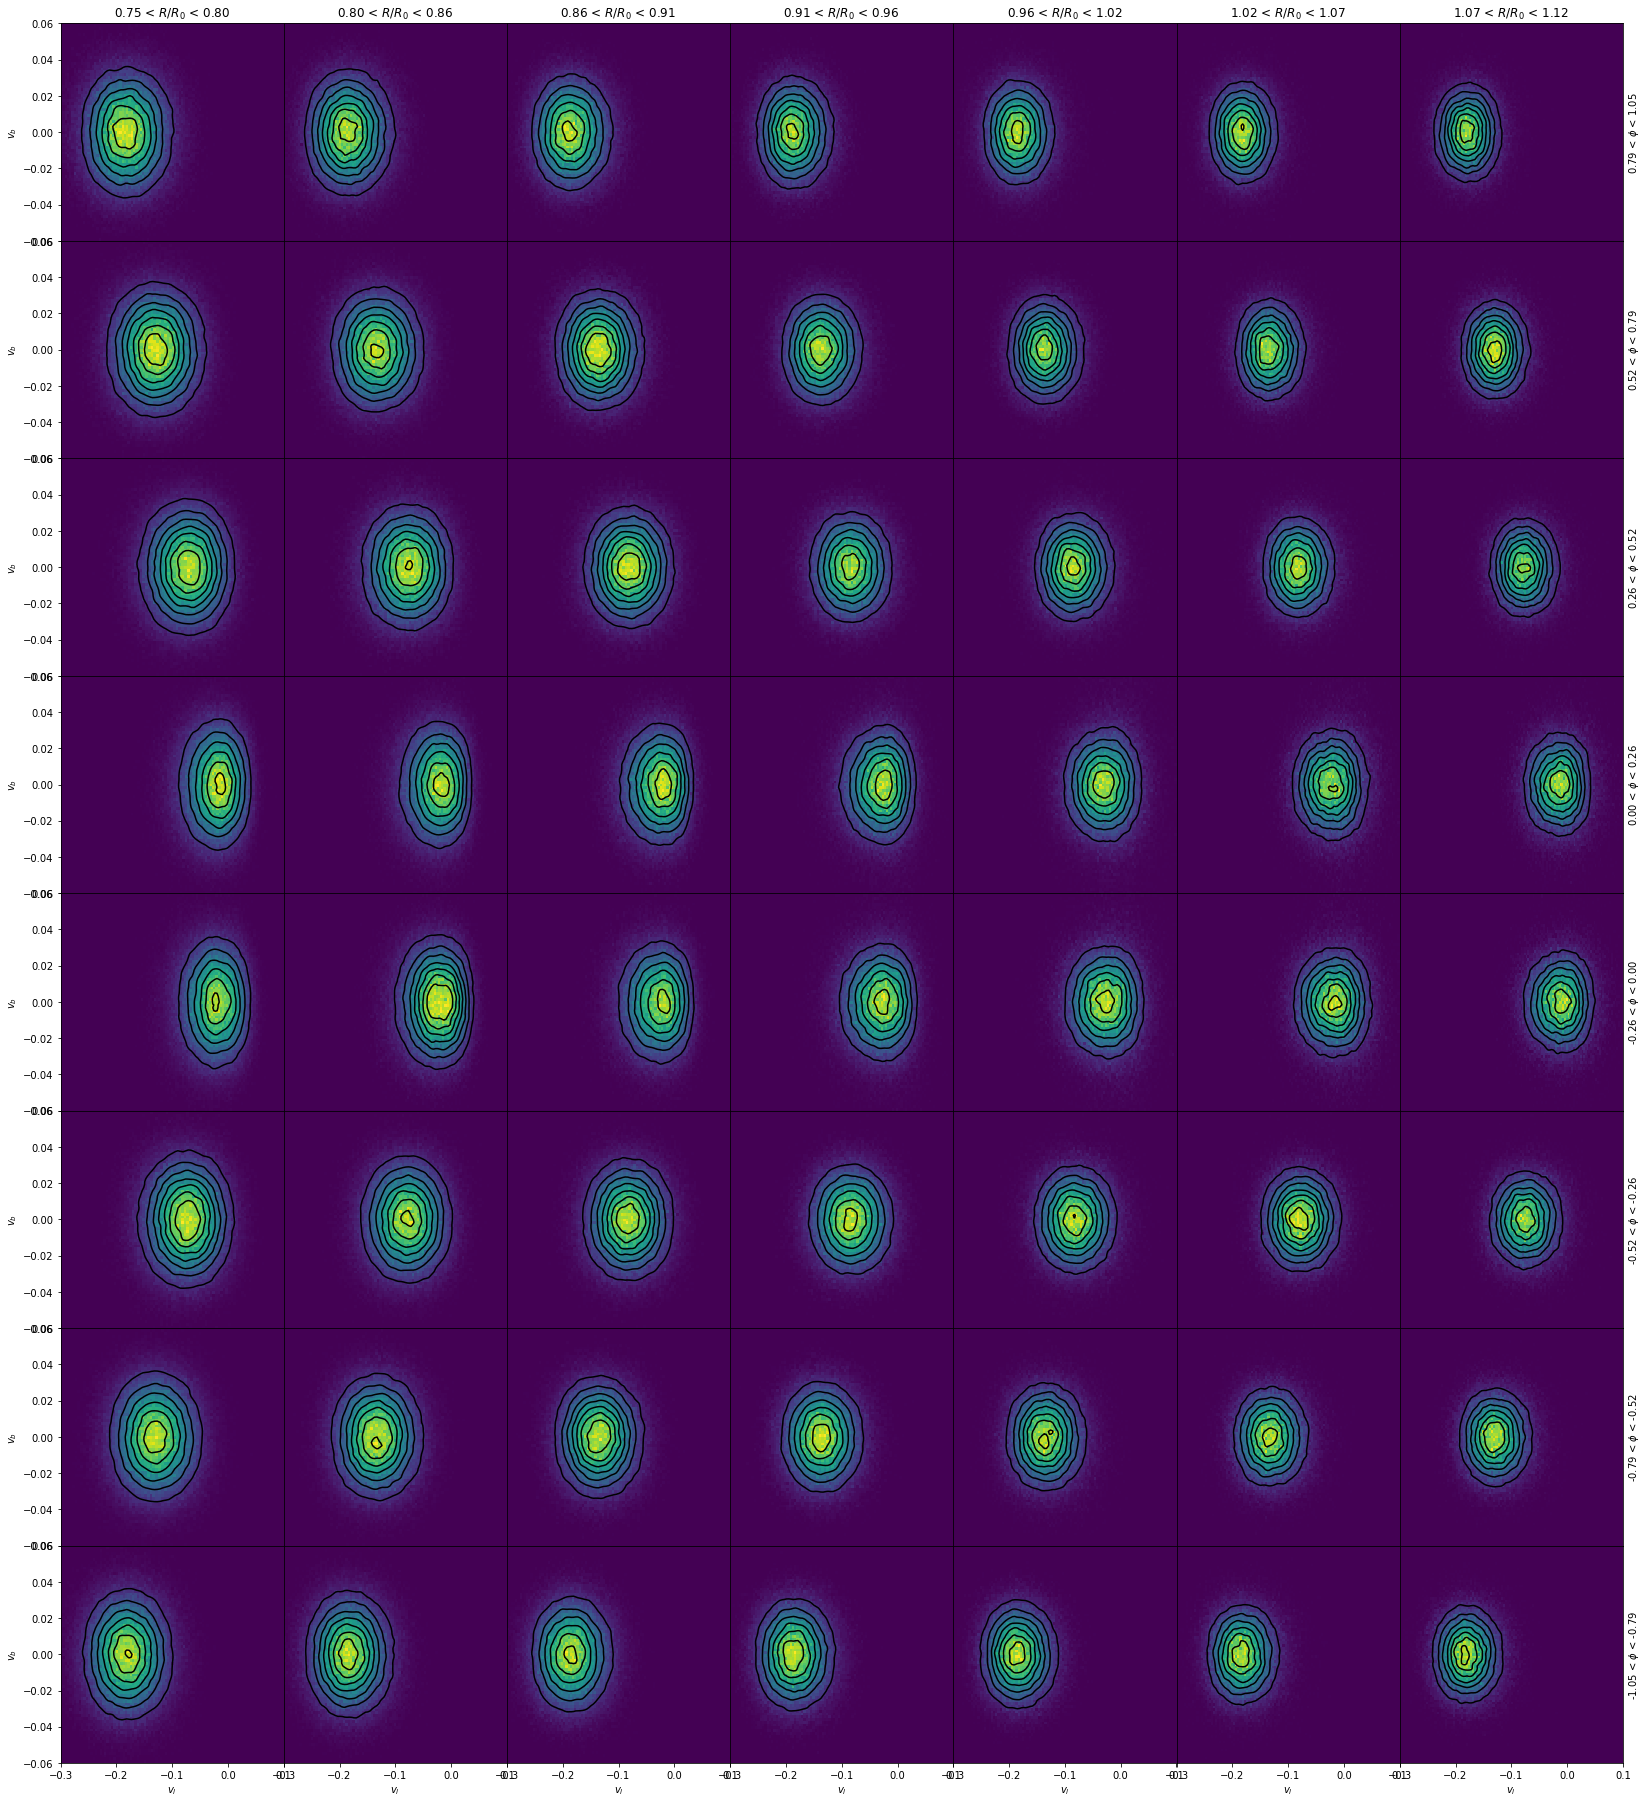

In [12]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vlvb(rows, cols, minR, maxR, minphi, maxphi, R, phi, vl, vb)

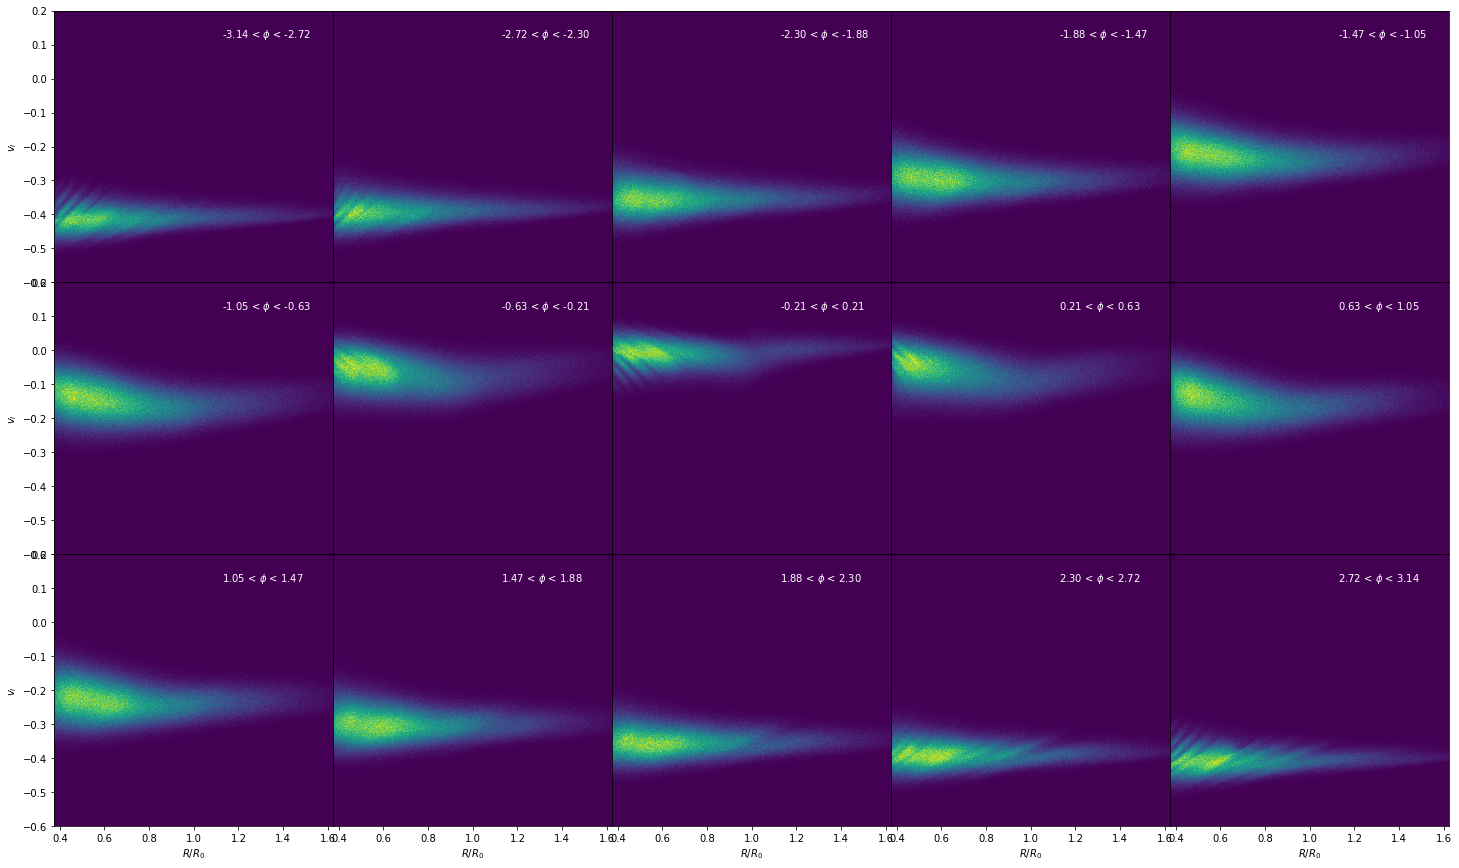

In [13]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_Rvl(rows, cols, minphi, maxphi, R, phi, vl)

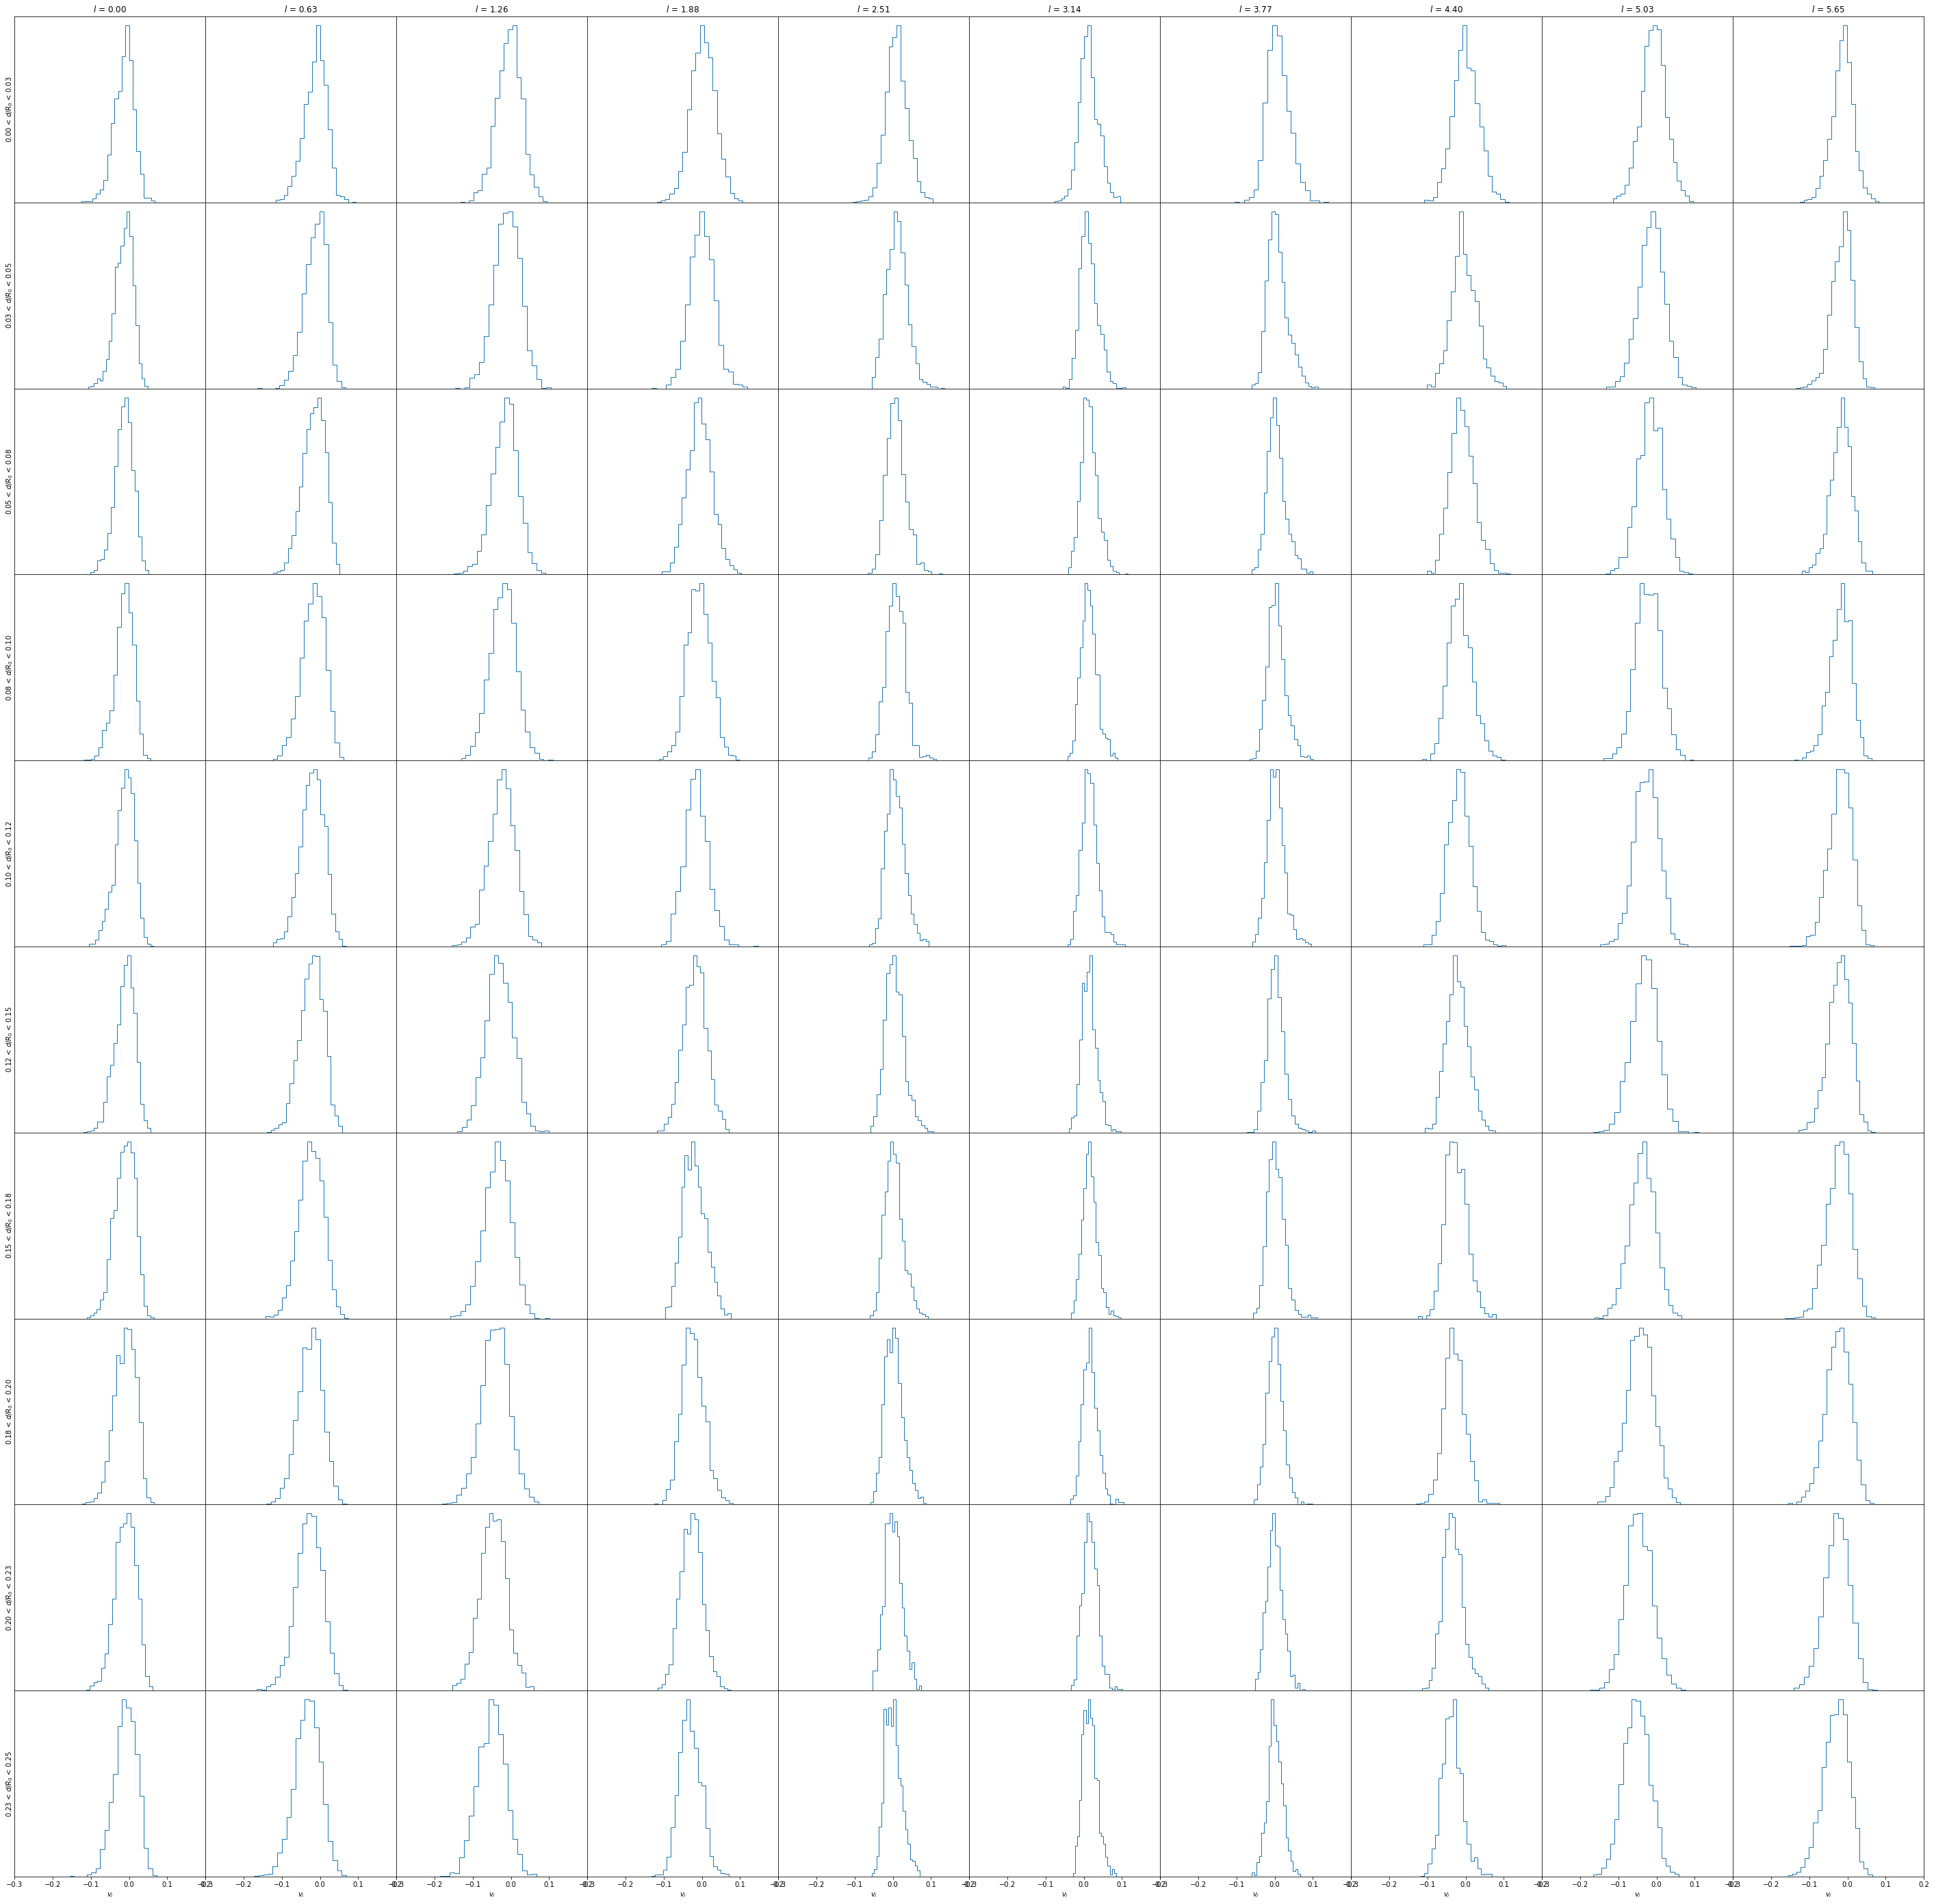

In [14]:
rows = 10
cols = 10
minl = 0
maxl = 2*np.pi
xlength = 0.25
ywidth = 0.01
plot_los(rows, cols, minl, maxl, xlength, ywidth, X, Y, vl)